In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('data/ronaldo_messi_stats.csv')

In [5]:
df

,clubr,age,mpr,gsr,astr,mpm,gsm,astm
0,Manchester United,19,40,6,7,25,8,3
1,Manchester United,20,50,9,8,36,17,3
2,Manchester United,21,47,12,8,40,16,13
3,Manchester United,22,53,23,15,51,38,17
4,Manchester United,23,49,42,7,53,47,11
5,Manchester United,24,53,26,9,55,53,23
6,Real Madrid,25,35,33,7,60,73,29
7,Real Madrid,26,54,53,15,50,60,15
8,Real Madrid,27,55,60,15,46,41,14
9,Real Madrid,28,55,55,12,57,58,27


Goals scored per season for club with age.

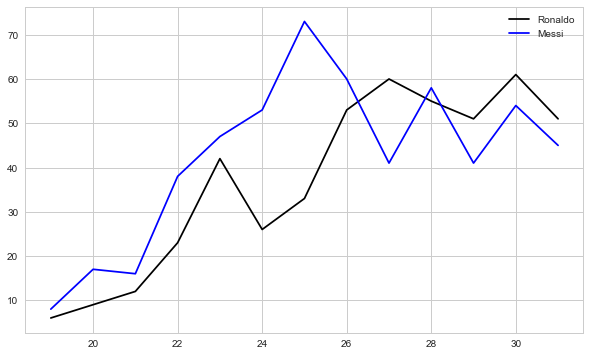

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['gsr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['gsm'], c = 'blue', label='Messi')
plt.legend()

Goals scored per match per season for club with age.

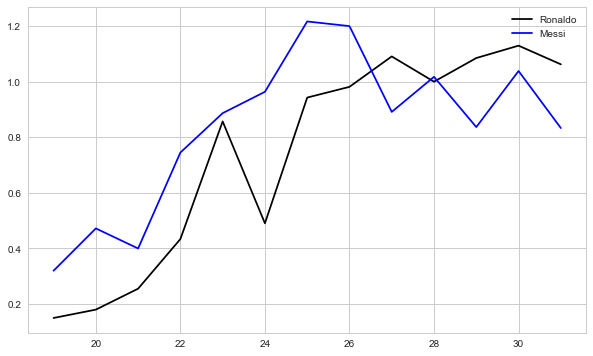

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['gsr']/df['mpr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['gsm']/df['mpm'], c = 'blue', label='Messi')
plt.legend()

Assists provided per season for club with age.

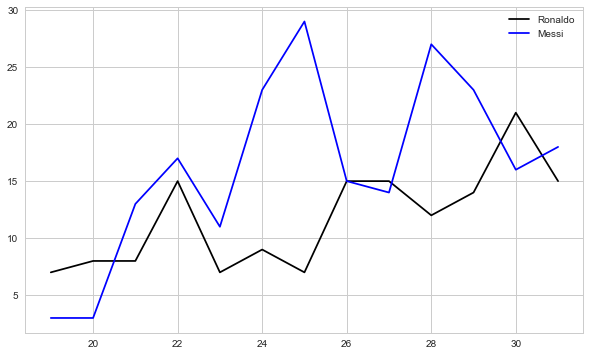

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['astr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['astm'], c = 'blue', label='Messi')
plt.legend()

Assists provided per match per season for club with age.

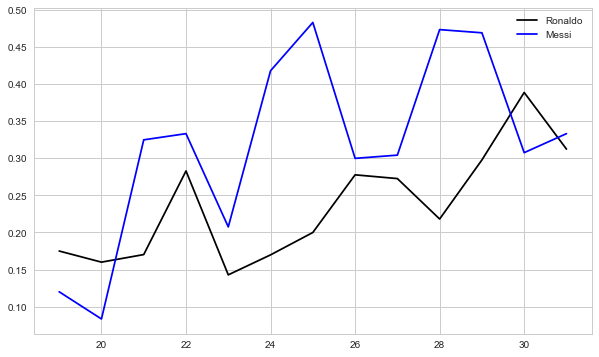

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['astr']/df['mpr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['astm']/df['mpm'], c = 'blue', label='Messi')
plt.legend()

Ronaldo was always behind Messi in goals and assists while in Manchester United. But he has significantly reduced the gap.

In [20]:
def bootstrap_mean_diff(x, y):
    meanx = np.mean(np.random.choice(x, size=len(x)))
    meany = np.mean(np.random.choice(y, size=len(y)))
    return meany - meanx

In [21]:
#Manchester United dataset
mu_df = df[df['clubr'] == "Manchester United"]
#Real Madrid dataset
rm_df = df[df['clubr'] == "Real Madrid"]

In [55]:
mu_gs_replicates = np.empty(10000)
rm_gs_replicates = np.empty(10000)

ronaldo_mu_ratio = mu_df['gsr']/mu_df['mpr']
ronaldo_mu_mean = ronaldo_mu_ratio.mean()
ronaldo_rm_ratio = rm_df['gsr']/rm_df['mpr']
ronaldo_rm_mean = ronaldo_rm_ratio.mean()

messi_mu_ratio = mu_df['gsm']/mu_df['mpm']
messi_mu_mean = messi_mu_ratio.mean()
messi_rm_ratio = rm_df['gsm']/rm_df['mpm']
messi_rm_mean = messi_rm_ratio.mean()

mu_gs_mean_diff = messi_mu_mean - ronaldo_mu_mean
rm_gs_mean_diff = messi_rm_mean - ronaldo_rm_mean

In [56]:
# Shift means for hypothesis testing that both Roanldo and Messi have same average goals per game ratio.
ronaldo_messi_mu_ratio = np.concatenate([ronaldo_mu_ratio, messi_mu_ratio])
ronaldo_messi_rm_ratio = np.concatenate([ronaldo_rm_ratio, messi_rm_ratio])
ronaldo_messi_mu_mean = ronaldo_messi_mu_ratio.mean()
ronaldo_messi_rm_mean = ronaldo_messi_rm_ratio.mean()

ronaldo_mu_ratio_shifted = ronaldo_mu_ratio - ronaldo_mu_mean + ronaldo_messi_mu_mean
messi_mu_ratio_shifted = messi_mu_ratio - messi_mu_mean + ronaldo_messi_mu_mean

ronaldo_rm_ratio_shifted = ronaldo_rm_ratio - ronaldo_rm_mean + ronaldo_messi_rm_mean
messi_rm_ratio_shifted = messi_rm_ratio - messi_rm_mean + ronaldo_messi_rm_mean

In [57]:
for i in range(10000):
    temp_diff_mu = bootstrap_mean_diff(ronaldo_mu_ratio_shifted, messi_mu_ratio_shifted)
    mu_gs_replicates[i] = temp_diff_mu
    temp_diff_rm = bootstrap_mean_diff(ronaldo_rm_ratio_shifted, messi_rm_ratio_shifted)
    rm_gs_replicates[i] = temp_diff_rm

In [63]:
mu_gs_mean_diff

0.23679312832310673

In [64]:
rm_gs_mean_diff

-0.03691989829168141

In [60]:
np.sum(mu_gs_replicates >= mu_gs_mean_diff) / 10000

0.044999999999999998

So, with significance level of 0.05, Messi had significantly better goals per game ratio in Ronaldo MU age era.

In [65]:
np.sum(rm_gs_replicates < rm_gs_mean_diff) / 10000

0.28620000000000001

No significant difference between goals per game ratio between Ronaldo and Messi in Ronaldo RM era.

##### Thus joining Real Madrid has helped increase Ronaldo's goalscoring rate.

In [67]:
ronaldo_gs_mu_rm_replicates = np.empty(10000)

In [73]:
ronaldo_mu_rm_diff_mean = ronaldo_rm_mean - ronaldo_mu_mean
ronaldo_mu_rm_diff_mean

0.6472850050327541

In [70]:
ronaldo_rm_shifted = ronaldo_rm_ratio - ronaldo_rm_mean + (df['gsr']/df['mpr']).mean()
ronaldo_mu_shifted = ronaldo_mu_ratio - ronaldo_mu_mean + (df['gsr']/df['mpr']).mean()

In [71]:
for i in range(10000):
    temp = bootstrap_mean_diff(ronaldo_mu_shifted, ronaldo_rm_shifted)
    ronaldo_gs_mu_rm_replicates[i] = temp

In [72]:
np.sum(ronaldo_gs_mu_rm_replicates >= ronaldo_mu_rm_diff_mean) / 10000

0.0

##### Ronaldo's goalscoring rate has been improved significantly after joining Real Madrid with almost 100% confidence interval.

### Visualization

In [6]:
import plotly
import plotly.graph_objs as go
from plotly import tools

In [7]:
plotly.offline.init_notebook_mode(connected=True)

### Ronaldo vs Messi goals per match

In [8]:
trace0 = go.Scatter(x=df['age'], y=df['gsr']/df['mpr'], name='Ronaldo', line=dict(color='#c6152a'))
trace1 = go.Scatter(x=df['age'], y=df['gsm']/df['mpm'], name='Messi', line=dict(color='#5861e2'))
data = [trace0, trace1]

layout = {
    
    'title': 'Ronaldo vs Messi: Goals Scored Per Match',
    'xaxis': {'showgrid': False, 'title': 'Age'},
    'yaxis': {'showgrid':False, 'title': 'Goals Per Match'},
    
    'shapes': [
        {
            'type': 'rect',
            # x-reference is assigned to the x-values
            'xref': 'x',
            # y-reference is assigned to the plot paper [0,1]
            'yref': 'paper',
            'x0': 19,
            'y0': 0,
            'x1': 24,
            'y1': 1,
            'fillcolor': '#d82d2d',
            'opacity': 0.2,
            'line': {
                'width': 0,
            }
        }
    ]
}

plotly.offline.iplot({'data' : data, 'layout' : layout})

In [10]:
# to save svg image of above graph
#plotly.offline.iplot({'data' : data, 'layout' : layout}, validate=False, show_link=False, image='jpeg', image_width=1200, image_height=600)

In [30]:
plotly.offline.plot({'data' : data, 'layout' : layout}, validate=False, show_link=False, include_plotlyjs=False, output_type='div')

'<div id="deac1440-afc6-4609-b797-6dc289f0bf2f" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("deac1440-afc6-4609-b797-6dc289f0bf2f", [{"line": {"color": "#c6152a"}, "name": "Ronaldo", "x": [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], "y": [0.15, 0.18, 0.2553191489361702, 0.4339622641509434, 0.8571428571428571, 0.49056603773584906, 0.9428571428571428, 0.9814814814814815, 1.0909090909090908, 1.0, 1.0851063829787233, 1.1296296296296295, 1.0625], "type": "scatter"}, {"line": {"color": "#5861e2"}, "name": "Messi", "x": [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], "y": [0.32, 0.4722222222222222, 0.4, 0.7450980392156863, 0.8867924528301887, 0.9636363636363636, 1.2166666666666666, 1.2, 0.8913043478260869, 1.0175438596491229, 0.8367346938775511, 1.0384615384615385, 0.8333333333333334], "type": "scatter"}], {"title": "Ronaldo vs 

### Ronaldo vs Messi: Assists Per Match

In [33]:
trace0 = go.Scatter(x=df['age'], y=df['astr']/df['mpr'], name='Ronaldo', line=dict(color='#c6152a'))
trace1 = go.Scatter(x=df['age'], y=df['astm']/df['mpm'], name='Messi', line=dict(color='#5861e2'))
data = [trace0, trace1]

layout = {
    
    'title': 'Ronaldo vs Messi: Assists Provided Per Match',
    'xaxis': {'showgrid': False, 'title': 'Age'},
    'yaxis': {'showgrid':False, 'title': 'Assists Per Match'},
    
    'shapes': [
        {
            'type': 'rect',
            # x-reference is assigned to the x-values
            'xref': 'x',
            # y-reference is assigned to the plot paper [0,1]
            'yref': 'paper',
            'x0': 19,
            'y0': 0,
            'x1': 24,
            'y1': 1,
            'fillcolor': '#d82d2d',
            'opacity': 0.2,
            'line': {
                'width': 0,
            }
        }
    ]
}

plotly.offline.iplot({'data' : data, 'layout' : layout})

In [35]:
# to save svg image of above graph
#plotly.offline.plot({'data' : data, 'layout' : layout}, validate=False, show_link=False, image='svg')

In [36]:
plotly.offline.plot({'data' : data, 'layout' : layout}, validate=False, show_link=False, include_plotlyjs=False, output_type='div')

'<div id="c0101230-f980-47e9-8bd1-806db9d37355" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("c0101230-f980-47e9-8bd1-806db9d37355", [{"line": {"color": "#c6152a"}, "name": "Ronaldo", "x": [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], "y": [0.175, 0.16, 0.1702127659574468, 0.2830188679245283, 0.14285714285714285, 0.16981132075471697, 0.2, 0.2777777777777778, 0.2727272727272727, 0.21818181818181817, 0.2978723404255319, 0.3888888888888889, 0.3125], "type": "scatter"}, {"line": {"color": "#5861e2"}, "name": "Messi", "x": [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], "y": [0.12, 0.08333333333333333, 0.325, 0.3333333333333333, 0.20754716981132076, 0.41818181818181815, 0.48333333333333334, 0.3, 0.30434782608695654, 0.47368421052631576, 0.46938775510204084, 0.3076923076923077, 0.3333333333333333], "type": "scatter"}], {"title": 